In [1]:
%matplotlib inline
%load_ext autoreload
from nilearn import image, plotting
from matplotlib import pyplot as plt
import numpy as np 
from scipy import stats
import seaborn as sns
import pickle

In [ ]:
%autoreload 1

In [ ]:
%aimport preprocess.normalization
%aimport preprocess.reader
%aimport preprocess.analyzer

In [ ]:
img = image.load_img('example.nii')

In [ ]:
plotting.plot_anat(img)

In [ ]:
plotting.plot_img(img)

In [ ]:
raw_data = img.get_data()

### Draw by layers

In [ ]:
plt.imshow(raw_data[:,:,21])

In [ ]:
plt.imshow(raw_data[:,80,:])

In [ ]:
plt.imshow(raw_data[80,:,:])

In [ ]:
from os import walk

In [ ]:
imgs = {}
for  (dirpath, dirnames, filenames) in walk("data"): 
    for i in filenames: 
        if i.endswith("nii"):
            name = dirpath + "/" + i
            group = dirpath.split("/")[1].split("_")[-1][-1]
            session = dirpath.split("/")[-2]
            date = dirpath.split("/")[-1]
            imgs[name] = {
                "img" : image.smooth_img(name, None), 
                "group" : group,
                "session" : session,
                "date" : date,
                "data" : image.smooth_img(name, None).get_data()
            }

In [ ]:
data = [ v["data"] for _, v in imgs.items()]
data = list(filter(lambda x: x.shape == (256, 256, 128, 1), data))

In [ ]:
imgs['OASIS2/OAS2_0001_MR2/1/123127131/mpr-1.nifti.img']["data"].shape

In [ ]:
import seaborn as sns


In [ ]:
sns.distplot(voxel_dist[80][80][80][0], bins=40)
#stats.entropy(voxel_dist[80][60][60][0])

In [ ]:
stats.entropy(voxel_dist[30][0][0][0])

In [ ]:
np.min(voxel_dist[0][0][0][0])

In [ ]:
voxel_dist.shape

In [ ]:
voxel_dist.shape

In [ ]:
voxel_entropy = np.apply_over_axes(, voxel_dist,[-1] )

In [ ]:
stats.entropy([0, 0])

In [ ]:
import os
from nilearn import image, plotting
from matplotlib import pyplot as plt
import numpy as np 
from scipy import stats
import logging

In [ ]:
plt.imshow(data[0][:,80,:])

In [ ]:
import numpy as np
from scipy import stats



In [ ]:
plt.imshow(res['norm_test'][80,:,:])

In [ ]:
voxel_dist = np.stack(data, axis=-1)
np.apply_over_axes(np.histogram, voxel_dist,[-1])

In [ ]:
x = [0.1, 0.2, 0.4, 0.8]
voxel_dist = np.stack(data, axis=-1)
for x in np.nditer(data, op_axes=[[0,1,2]]):
    print(x)
    break

In [ ]:
data = preprocess.reader.read_nii_arrays("data/test/", "nii", (256,256,166))
norm_data = preprocess.normalization.normalize(data)

In [ ]:
operators = [np.max, np.mean, np.var, np.min, np.median, preprocess.analyzer.norm_test, samples_to_entropy]
res = preprocess.analyzer.voxel_dist_operations(norm_data, operators)

In [ ]:

samples = 0
calc = 0

def calc_entropy(a, bins=100):
    global calc
    calc += 1
    return stats.entropy(np.histogram(a, bins=bins)[0]/len(a))

def samples_to_entropy(data, axis, bins=100):
    global samples
    samples += 1
    return np.apply_along_axis(calc_entropy, axis, data)

In [ ]:
calc

In [ ]:
res = preprocess.analyzer.voxel_dist_operations(norm_data, [samples_to_entropy])

In [ ]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=None, standardize=True)
normalized_imgs = masker.fit_transform(data)

In [ ]:
import nibabel

In [ ]:
sns.heatmap(res['samples_to_entropy'][:,80,:], cmap="YlGnBu")

In [ ]:
import nibabel as nib

In [ ]:
img = nib.load("data/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii")

In [ ]:
ax[0,0,0]

In [ ]:
?nib.load

In [ ]:
from sklearn import preprocessing
preprocessing.scale(data)

In [ ]:
data = preprocess.reader.read_nii_arrays("data/ADNI/")

In [ ]:
norm_data = preprocess.normalization.normalize(data)

In [ ]:
plt.imshow(norm_data[0][:, 80,:])

In [ ]:
norm_data

In [ ]:
stats.entropy([0,1])

In [ ]:
plt.imshow(data[0][:,0,:])

In [ ]:
%aimport preprocess.normalization
%aimport preprocess.reader
%aimport preprocess.analyzer

In [2]:
with open("data_analysis.pickle", "rb") as f: 
    b = pickle.load(f)

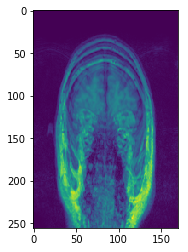

In [3]:
b[""]

{'amax': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0